In [1]:
%load_ext autoreload
%autoreload 2

### the above lines are to specify that changes in our py files are loaded before every execution. helpful if you're modifying preprocessing.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import random
import sys


# Importing Preprocessing

- if you code in a .py file, you can just use relative imports.

- otherwise, if you're in a notebook, use the below snippet to import preprocessing.
    - notebooks dont allow relative imports outside of known packages. we're just adding the neccessary directory to our syspath


    - you're going to need to have an \_\_init\_\_.py file in your directory if you want to import

In [31]:
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Some helpful lists for data access.
from preprocessing import DATA_ROOT, DATA_FOLDERS, DATA_SUBFOLDERS, SEGMENTATION_FILES, SEGMENTATION_NAMES 

# some helpful methods
from preprocessing import load_labels, image_generator, image_path_generator, batch_generator, load_segmentation, merge_dicts

In [6]:
# however, notice that our working directory is unchanged. we just added to system path for the above code.
print(os.getcwd())

c:\Users\rflor\Documents\Projects\MATH4570\final_project\MATH4570-final-project-1\Preprocessing


# About the data:
 - Data is stored in the renders file.
 - DATA_FOLDERS is the folders in the renders file.
 - each folder in DATA_FOLDERS is divided into 4 subfolders, which contain images. 
    - Those 4 subfolders have fairly self-explanatory names.

- each image's file name is it's ID. you can map this to the hemorrhage-labels.csv for the true labels for classification

In [7]:
DATA_ROOT

'renders'

In [8]:
DATA_FOLDERS

['epidural',
 'intraparenchymal',
 'itroventricular',
 'multi',
 'normal',
 'subarachnoid',
 'subdural']

In [9]:
DATA_SUBFOLDERS

['brain_bone_window', 'brain_window', 'max_contrast_window', 'subdural_window']

In [12]:
# all the folders that data is stored in.
for folder in DATA_FOLDERS:
    for subfolder in DATA_SUBFOLDERS:
        print(f"{DATA_ROOT}/{folder}/{subfolder}")

renders/epidural/brain_bone_window
renders/epidural/brain_window
renders/epidural/max_contrast_window
renders/epidural/subdural_window
renders/intraparenchymal/brain_bone_window
renders/intraparenchymal/brain_window
renders/intraparenchymal/max_contrast_window
renders/intraparenchymal/subdural_window
renders/itroventricular/brain_bone_window
renders/itroventricular/brain_window
renders/itroventricular/max_contrast_window
renders/itroventricular/subdural_window
renders/multi/brain_bone_window
renders/multi/brain_window
renders/multi/max_contrast_window
renders/multi/subdural_window
renders/normal/brain_bone_window
renders/normal/brain_window
renders/normal/max_contrast_window
renders/normal/subdural_window
renders/subarachnoid/brain_bone_window
renders/subarachnoid/brain_window
renders/subarachnoid/max_contrast_window
renders/subarachnoid/subdural_window
renders/subdural/brain_bone_window
renders/subdural/brain_window
renders/subdural/max_contrast_window
renders/subdural/subdural_window

# Let's access the hemorrhage-labels.csv file to get our y_true

In [25]:
# you can directly load the data into a csv like this if you really want.
df = pd.read_csv("../../hemorrhage-labels.csv", index_col="Image")
df

,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
Image,,,,,,
ID_000012eaf,0,0,0,0,0,0
ID_000039fa0,0,0,0,0,0,0
ID_00005679d,0,0,0,0,0,0
ID_00008ce3c,0,0,0,0,0,0
ID_0000950d7,0,0,0,0,0,0
...,...,...,...,...,...,...
ID_ffff82e46,0,0,0,0,0,0
ID_ffff922b9,1,0,0,1,0,0
ID_ffffb670a,1,0,0,0,1,0


In [26]:
# but i recommend using this to load the data into a dict. it's simple, quick (for access), and effective.

labels_dict = load_labels("../../Hemorrhage Segmentation Project")

In [27]:
# get labels by ID. our batch generator will give IDs attached to the images.
labels_dict["ID_ffff82e46"]

{'any': 0,
 'epidural': 0,
 'intraparenchymal': 0,
 'intraventricular': 0,
 'subarachnoid': 0,
 'subdural': 0}

# Loading labels for Segmentation
- returns a list of dfs
- access elements with .loc

- some indices have multiple rows (that's why we didnt convert to dict)

In [56]:
seg_dfs = load_segmentation("../../Hemorrhage Segmentation Project") # or set only_classification=True

loaded epidural segmentation data
loaded intraparenchymal segmentation data
loaded multiple segmentation data
loaded subarachnoid segmentation data
loaded subdural-1 segmentation data
loaded subdural-2 segmentation data


In [58]:
SEGMENTATION_NAMES

['epidural',
 'intraparenchymal',
 'multiple',
 'subarachnoid',
 'subdural-1',
 'subdural-2']

In [60]:
seg_dfs[SEGMENTATION_NAMES[2]].head(2)

,Case ID,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
Origin,,,,,,,,,,,,,
ID_01af922c3,1198534,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.396484375, ""y"": 0.73046875}, {""x"": 0....",3.0,NaN,NaN,0.790347,NaN,NaN
ID_01af922c3,1198534,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.619140625, ""y"": 0.765625}, {""x"": 0.61...",3.0,NaN,NaN,0.790347,NaN,NaN


In [67]:
seg_dfs[SEGMENTATION_NAMES[2]].shape

(610, 13)

In [68]:
seg_dfs[SEGMENTATION_NAMES[3]].loc["ID_01af922c3"]

,Case ID,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
Origin,,,,,,,,,,,,,
ID_01af922c3,1198534,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.396484375, ""y"": 0.73046875}, {""x"": 0....",3.0,NaN,NaN,0.790347,NaN,NaN
ID_01af922c3,1198534,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.619140625, ""y"": 0.765625}, {""x"": 0.61...",3.0,NaN,NaN,0.790347,NaN,NaN
ID_01af922c3,1198534,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.46875, ""y"": 0.607421875}, {""x"": 0.468...",3.0,NaN,NaN,0.790347,NaN,NaN


# We'll use Generators to access data. 

 - Image data is total 10-11 GB of data
 - Infeasible to load that into memory for every computer.

 - Generator functions are defined in preprocessing.py in the root directory.

# Ensure that the data is loaded in the correct spots locally

In [3]:
# Should look like _______ MATH4570-final-project-1\Preprocessing
# unzip the contents of the OneDrive folder into the parent directory of the git repo.
# so the 3 files should be renders, dcms (empty), hemhorrage-labels
print(os.getcwd())

c:\Users\rflor\Documents\Projects\MATH4570\final_project\MATH4570-final-project-1\Preprocessing


In [18]:
# generators produce an iterable object, which we use to get data as we use it.
ep_bbw = image_generator("../../renders/epidural/brain_bone_window")


In [19]:
# this is how you get samples from the single-generator
sample_img, sample_id = next(ep_bbw)
second_img, second_id = next(ep_bbw)

# Some different ways to visualize a specific RGB image

In [20]:
# Using plotly express for more in-depth imaging.
px.imshow(sample_img, title=sample_id)

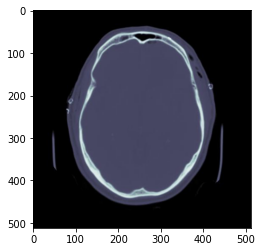

In [22]:
# using matplotlib
plt.imshow(second_img)

# How to use batch generator

- set batch_size to the desired size
- you'll get given increments of data in specific batches. you can then use this however you want!
  - treat each batch as an epoch! etc.

In [23]:
# instantiate batch generator object
# we'll set the size of batches here.

batch_gen = batch_generator('../../renders/epidural/max_contrast_window', batch_size=9)

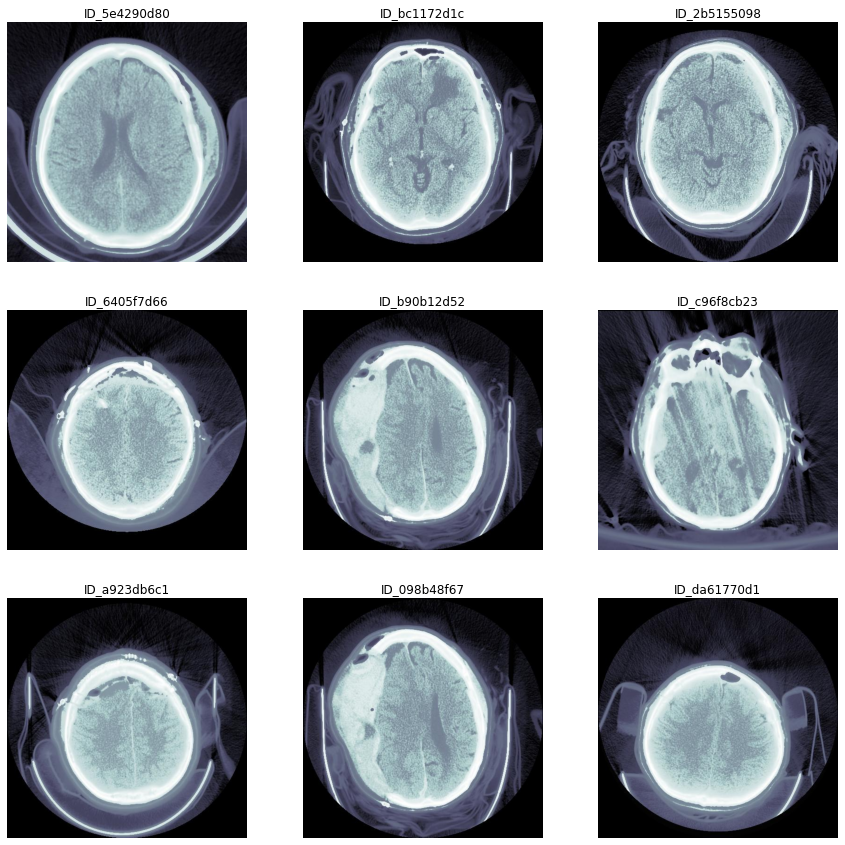

In [24]:
# this is the first batch of 9. If you re-run this code you'll get different results.
images, ids = next(batch_gen)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# you need to ravel if you want to only have one loop layer
axs = axs.ravel()


for i, (img, file_id) in enumerate(zip(images, ids)):
    axs[i].imshow(img)
    axs[i].set_title(file_id)
    axs[i].axis('off')

plt.show()
